# Waiter Tips Prediction

In [193]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


import warnings
warnings.filterwarnings("ignore")


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, HuberRegressor , ElasticNet ,BayesianRidge
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
data = pd.read_csv("tips.csv")
df = pd.DataFrame(data)

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


<Axes: ylabel='Density'>

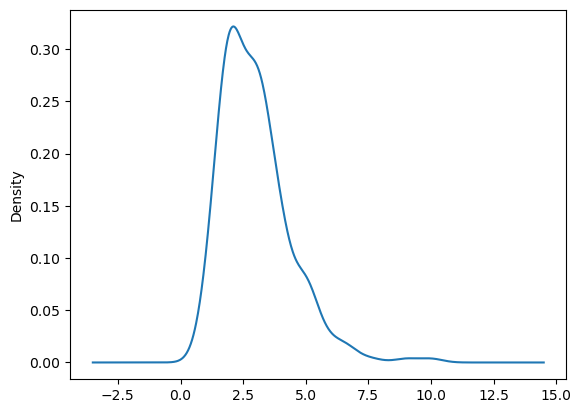

In [8]:
df["tip"].plot(kind="density")

In [9]:
figure = px.scatter(
    data_frame=df, x="total_bill", y="tip", size="size", color="day", trendline="ols"
)
figure.show()

In [10]:
figure = px.scatter(
    data_frame=data, x="total_bill", y="tip", size="size", color="sex", trendline="ols"
)


figure.show()

In [11]:
figure = px.scatter(
    data_frame=data, x="total_bill", y="tip", size="size", color="time", trendline="ols"
)


figure.show()

In [12]:
figure = px.scatter(
    data_frame=data,
    x="total_bill",

    y="tip",
    size="size",
    color="smoker",
    trendline="ols",
)
figure.show()

In [13]:
figure = px.pie(df, values="tip", names="day", hole=.5)
figure.show()

In [14]:
figure = px.pie(df, values="tip", names="sex", hole=0.5)
figure.show()

In [15]:
figure = px.pie(df, values="tip", names="smoker", hole=0.5)
figure.show()

In [16]:
figure = px.pie(df, values="tip", names="time", hole=0.5)
figure.show()

In [17]:
figure = px.pie(df, values="tip", names="size", hole=0.5)
figure.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


## Waiter Tips Prediction Model

### Label Encoder

In [19]:
sex_le = LabelEncoder()
smoker_le = LabelEncoder()
day_le = LabelEncoder()
time_le = LabelEncoder()

df["sex"] = sex_le.fit_transform(df["sex"])
df["smoker"] = smoker_le.fit_transform(df["smoker"])
df["day"] = day_le.fit_transform(df["day"])
df["time"] = time_le.fit_transform(df["time"])

In [20]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    int32  
 3   smoker      244 non-null    int32  
 4   day         244 non-null    int32  
 5   time        244 non-null    int32  
 6   size        244 non-null    int64  
dtypes: float64(2), int32(4), int64(1)
memory usage: 9.7 KB


In [22]:
df.corr()

,total_bill,tip,sex,smoker,day,time,size
total_bill,1.000000,0.675734,0.144877,0.085721,-0.043550,-0.183118,0.598315
tip,0.675734,1.000000,0.088862,0.005929,-0.011548,-0.121629,0.489299
sex,0.144877,0.088862,1.000000,0.002816,-0.078292,-0.205231,0.086195
smoker,0.085721,0.005929,0.002816,1.000000,-0.282721,-0.054921,-0.133178
day,-0.043550,-0.011548,-0.078292,-0.282721,1.000000,0.638019,0.069510
time,-0.183118,-0.121629,-0.205231,-0.054921,0.638019,1.000000,-0.103411
size,0.598315,0.489299,0.086195,-0.133178,0.069510,-0.103411,1.000000


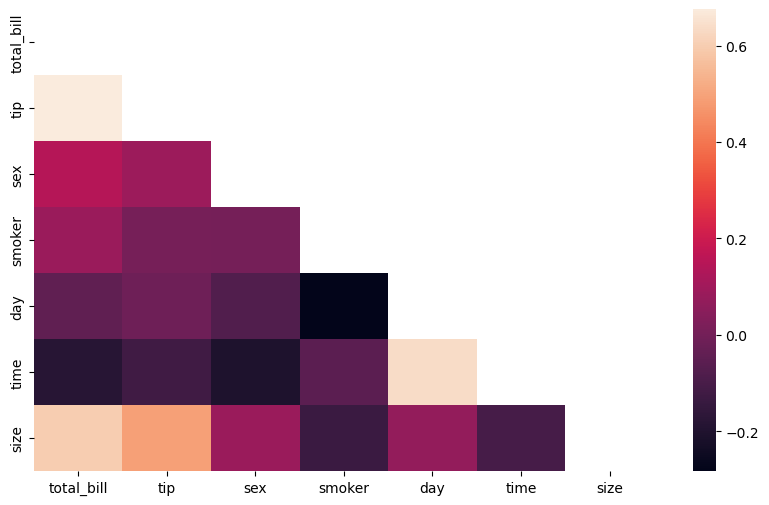

In [23]:
plt.figure(figsize=(10,6))


mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df.corr(), annot=True, mask=mask)
plt.show()

## Linear regression

In [126]:
x = np.array(df[["total_bill", "sex", "smoker", "day", "time", "size"]])
y = np.array(df["tip"])

xtrain, xtest, ytrain, ytest = train_test_split( x, y, test_size= 0.2, random_state=42 )

In [127]:
# Linear Regression

model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

### test the regression model

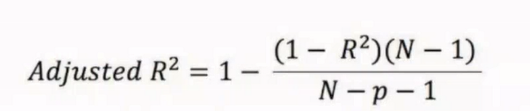

In [128]:
def get_score(model, ypred):
    
    mae = mean_absolute_error(ytest, ypred)
    mse = mean_squared_error(ytest, ypred)
    r2 = r2_score(ytest, ypred)
    r2_adj = 1 - r2
    
    print(f"Socre for Test data: {model.score(xtest, ytest)}")
    print(f"Socre for Train data: {model.score(xtrain, ytrain)}")
    print(f"Cofeciant of modern: {model.coef_}")

    print("-" * 100)

    print(f"Model Parameters: {model.get_params()}")
    print(f"Model Interpretection : {model.intercept_}")
#    print(f"Model Rank : {model.rank_}")

    print("-" * 100)

   # print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R²): {r2}")
    print(f"R-adj : {r2_adj}")

In [129]:
ypred = model.predict(xtest)

In [130]:
get_score(model, ypred) # type: ignore

Socre for Test data: 0.4441368826121933
Socre for Train data: 0.45591717043382185
Cofeciant of modern: [ 0.09396463  0.03271041 -0.19174368 -0.00682977  0.06122632  0.24030326]
----------------------------------------------------------------------------------------------------
Model Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Model Interpretection : 0.6168860533827676
Model Rank : 6
----------------------------------------------------------------------------------------------------
Mean Squared Error (MSE): 0.6948129686287708
R-squared (R²): 0.4441368826121933
R-adj : 0.5558631173878067


In [132]:
df_test = pd.DataFrame(
    {"y_pred": ypred, "y_obser": ytest}
)

In [134]:
df_test.head(5)

,y_pred,y_obser
0,2.985752,3.18
1,1.940613,2.00
2,3.903982,2.00
3,3.844980,5.16
4,2.168026,2.00


In [111]:
fig = px.line(df_test, title="Comparison Between Y_pred and Y_obser",markers=True)
fig.show()

### Feature Selection Tests ###

In [77]:
X = df[["total_bill", "sex", "smoker", "day", "time", "size"]]
Y = df["tip"]

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

# Combine the training data back into a DataFrame for statsmodels
train_data = pd.DataFrame(xtrain, columns=X.columns)
train_data["tip"] = ytrain

# Fit the full model
full_model = ols(
    "tip ~ total_bill + sex + smoker + day + time + size", data=train_data
).fit()

# List of all parameters
params = ["total_bill", "sex", "smoker", "day", "time", "size"]

# Perform the partial F-test for each parameter
for param in params:
    # Create a formula for the reduced model by excluding the current parameter
    reduced_formula = "tip ~ " + " + ".join([p for p in params if p != param])
    reduced_model = ols(reduced_formula, data=train_data).fit()

    # Perform the partial F-test
    f_test = full_model.compare_f_test(reduced_model)

    print(f"Testing exclusion of parameter: {param}")
    print("F-statistic:", f_test[0])
    print("p-value:", f_test[1])
    print("Degrees of freedom difference:", f_test[2])
    print("-" * 50)

    # Interpretation
    if f_test[1] < 0.05:
        print(f"The parameter '{param}' significantly improves the model.")
    else:
        print(f"The parameter '{param}' does not significantly improve the model.")
    print("=" * 50)
    print("")

Testing exclusion of parameter: total_bill
F-statistic: 71.26082883504452
p-value: 8.288179905132707e-15
Degrees of freedom difference: 1.0
--------------------------------------------------
The parameter 'total_bill' significantly improves the model.

Testing exclusion of parameter: sex
F-statistic: 0.039362574893567356
p-value: 0.8429464682305352
Degrees of freedom difference: 1.0
--------------------------------------------------
The parameter 'sex' does not significantly improve the model.

Testing exclusion of parameter: smoker
F-statistic: 1.2577588580856207
p-value: 0.26350616027337526
Degrees of freedom difference: 1.0
--------------------------------------------------
The parameter 'smoker' does not significantly improve the model.

Testing exclusion of parameter: day
F-statistic: 0.0038951857824647473
p-value: 0.9503015016967723
Degrees of freedom difference: 1.0
--------------------------------------------------
The parameter 'day' does not significantly improve the model.



In [78]:
df[df["total_bill"] == 20.45]

,total_bill,tip,sex,smoker,day,time,size
227,20.45,3.0,1,0,1,0,4


In [79]:
# features = [[total_bill, "sex", "smoker", "day", "time", "size"]]
features = np.array([[20.45, 1, 0, 1, 0, 4]])
model.predict(features)

array([3.52555642])

In [80]:
x = np.array(df[["total_bill", "sex"]])
y = np.array(df["tip"])


xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [81]:
# Linear Regression

model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [82]:
get_score(model)

Socre for Test data: 0.5431115864592302
Socre for Train data: 0.43100567961831704
Cofeciant of modern: [0.10678783 0.02233036]
----------------------------------------------------------------------------------------------------
Model Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Model Interpretection : 0.9142479869931406
Model Rank : 2


In [83]:
features = np.array([[20.45, 1]])
model.predict(features)

array([3.12038951])

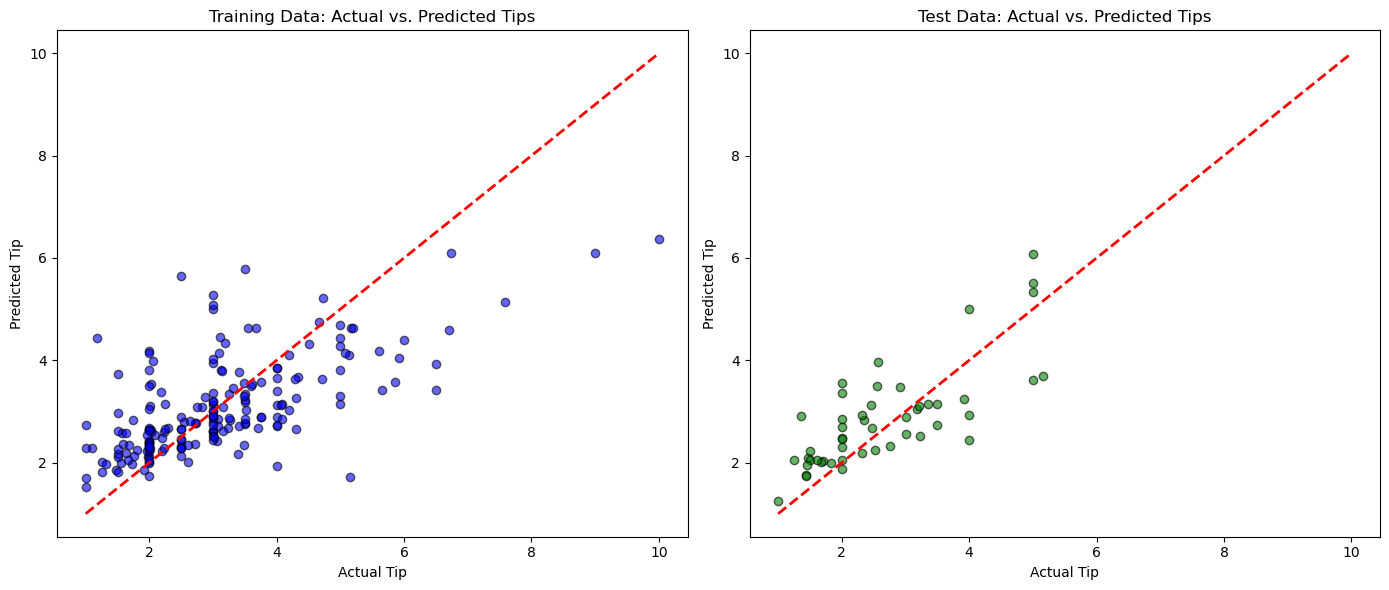

In [84]:
# Predict values
ytrain_pred = model.predict(xtrain)
ytest_pred = model.predict(xtest)

# Scatter plot for training data
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(ytrain, ytrain_pred, color="blue", edgecolor="k", alpha=0.6)
plt.xlabel("Actual Tip")
plt.ylabel("Predicted Tip")
plt.title("Training Data: Actual vs. Predicted Tips")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--", lw=2)  # Diagonal line

# Scatter plot for testing data
plt.subplot(1, 2, 2)
plt.scatter(ytest, ytest_pred, color="green", edgecolor="k", alpha=0.6)
plt.xlabel("Actual Tip")
plt.ylabel("Predicted Tip")
plt.title("Test Data: Actual vs. Predicted Tips")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--", lw=2)  # Diagonal line

plt.tight_layout()
plt.show()

### Ols Table

In [112]:
ols_model = sm.OLS(ytrain, xtrain).fit()
print(ols_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.902
Model:                            OLS   Adj. R-squared (uncentered):              0.899
Method:                 Least Squares   F-statistic:                              291.2
Date:                Sun, 14 Jul 2024   Prob (F-statistic):                    1.21e-92
Time:                        20:49:24   Log-Likelihood:                         -288.52
No. Observations:                 195   AIC:                                      589.0
Df Residuals:                     189   BIC:                                      608.7
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

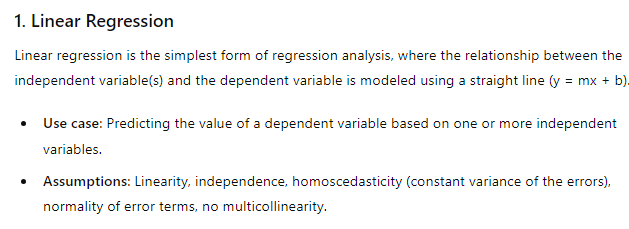

### Ridge Regression

In [169]:
x = np.array(df[["total_bill", "sex", "smoker", "day", "time", "size"]])
y = np.array(df["tip"])

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [173]:
# Ridge Regression
ridge_reg = Ridge()
ridge_reg.fit(xtrain, ytrain)

Ridge()

In [175]:
ypred = ridge_reg.predict(xtest)

In [176]:
def get_score(model, ypred):

    mae = mean_absolute_error(ytest, ypred)
    mse = mean_squared_error(ytest, ypred)
    r2 = r2_score(ytest, ypred)
    r2_adj = 1 - r2

    print(f"Socre for Test data: {model.score(xtest, ytest)}")
    print(f"Socre for Train data: {model.score(xtrain, ytrain)}")
    print(f"Cofeciant of modern: {model.coef_}")

    print("-" * 100)

    print(f"Model Parameters: {model.get_params()}")
    print(f"Model Interpretection : {model.intercept_}")
    print(f"Model Rank : {model.rank_}")

    print("-" * 100)

    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R²): {r2}")
    print(f"R-adj : {r2_adj}")

In [177]:
get_score(lasso_reg, ypred)

Socre for Test data: 0.5467115210170848
Socre for Train data: 0.42451945167713157
Cofeciant of modern: [ 0.09389647  0.         -0.          0.         -0.          0.        ]
----------------------------------------------------------------------------------------------------
Model Parameters: {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
Model Interpretection : 1.1894249067779643
----------------------------------------------------------------------------------------------------
Mean Squared Error (MSE): 0.6927491774762521
R-squared (R²): 0.44578795338299426
R-adj : 0.5542120466170057


In [92]:
features = np.array([[20.45, 1, 0, 1, 0, 4]])
ridge_reg.predict(features)

array([3.52070406])

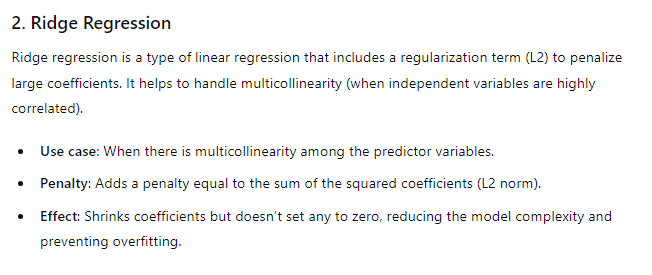
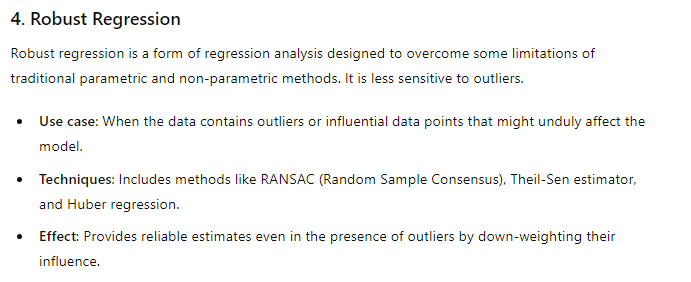
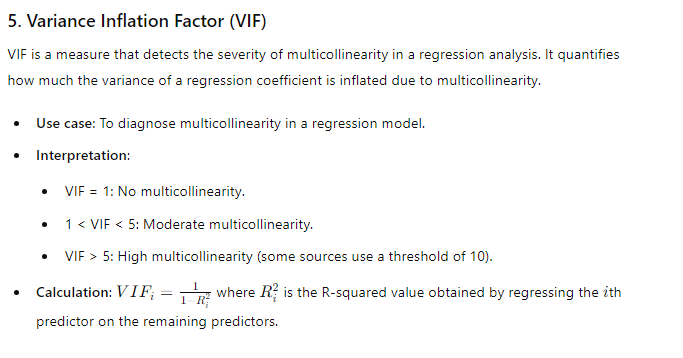
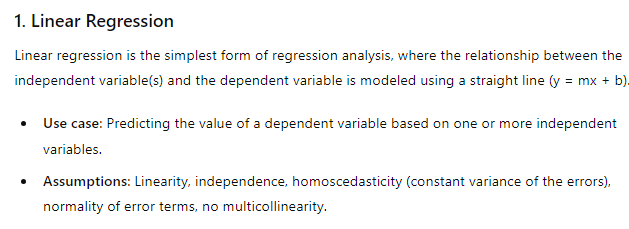
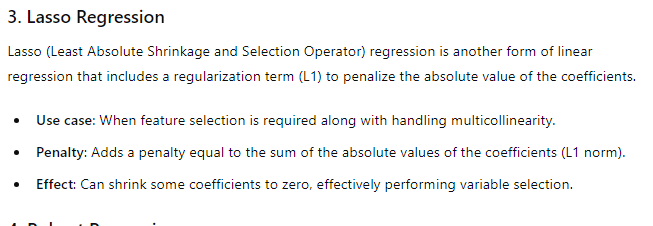

### Lasso Regression

In [136]:
x = np.array(df[["total_bill", "sex", "smoker", "day", "time", "size"]])
y = np.array(df["tip"])

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [137]:
# Lasso Regression
lasso_reg = Lasso()
lasso_reg.fit(xtrain, ytrain)

Lasso()

In [147]:
print(f"Socre for Test data: {lasso_reg.score(xtest, ytest)}")
print(f"Socre for Train data: {lasso_reg.score(xtrain, ytrain)}")
print(f"Cofeciant of modern: {lasso_reg.coef_}")

print("-" * 100)

print(f"Model Parameters: {lasso_reg.get_params()}")
print(f"Model Interceot : {lasso_reg.intercept_}")

Socre for Test data: 0.5467115210170848
Socre for Train data: 0.42451945167713157
Cofeciant of modern: [ 0.09389647  0.         -0.          0.         -0.          0.        ]
----------------------------------------------------------------------------------------------------
Model Parameters: {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
Model Interceot : 1.1894249067779643


In [139]:
features = np.array([[20.45, 1, 0, 1, 0, 4]])
lasso_reg.predict(features)

array([3.10960774])

In [150]:
ypred = lasso_reg.predict(xtest)

In [153]:
def get_score(model, ypred):

    mae = mean_absolute_error(ytest, ypred)
    mse = mean_squared_error(ytest, ypred)
    r2 = r2_score(ytest, ypred)
    r2_adj = 1 - r2

    print(f"Socre for Test data: {model.score(xtest, ytest)}")
    print(f"Socre for Train data: {model.score(xtrain, ytrain)}")
    print(f"Cofeciant of modern: {model.coef_}")

    print("-" * 100)

    print(f"Model Parameters: {model.get_params()}")
    print(f"Model Interpretection : {model.intercept_}")
    #    print(f"Model Rank : {model.rank_}")

    print("-" * 100)

    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R²): {r2}")
    print(f"R-adj : {r2_adj}")

In [154]:
get_score(lasso_reg, ypred)

Socre for Test data: 0.5467115210170848
Socre for Train data: 0.42451945167713157
Cofeciant of modern: [ 0.09389647  0.         -0.          0.         -0.          0.        ]
----------------------------------------------------------------------------------------------------
Model Parameters: {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
Model Interpretection : 1.1894249067779643
----------------------------------------------------------------------------------------------------
Mean Absolute Error (MAE): 0.6256100264339348
Mean Squared Error (MSE): 0.5665976098709373
R-squared (R²): 0.5467115210170848
R-adj : 0.45328847898291524


In [142]:
df_test = pd.DataFrame({"y_pred": ypred, "y_obser": ytest})

In [144]:
df_test.head(5)

,y_pred,y_obser
0,3.050453,3.18
1,2.012897,2.00
2,3.494583,2.00
3,3.620405,5.16
4,2.410079,2.00


In [145]:
fig = px.line(df_test, title="Comparison Between Y_pred and Y_obser", markers=True)
fig.show()

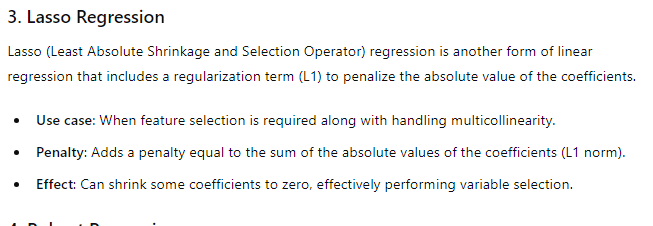

### Robust Regression

In [113]:
x = np.array(df[["total_bill", "sex", "smoker", "day", "time", "size"]])
y = np.array(df["tip"])

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [156]:
# After partial F test or Lasso Regression

x = np.array(df[["total_bill", "sex"]])
y = np.array(df["tip"])


xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [157]:
# Robust Regression
huber_reg = HuberRegressor()
huber_reg.fit(xtrain, ytrain)
print("Robust Regression coefficients:", huber_reg.coef_)

Robust Regression coefficients: [ 0.11705176 -0.07413931]


In [ ]:
features = np.array([[20.45, 1, 0, 1, 0, 4]])
huber_reg.predict(features)

In [158]:
features = np.array([[20.45, 1]])
huber_reg.predict(features)

array([3.07162981])

In [162]:
ypred = huber_reg.predict(xtest)

In [167]:
def get_score(model, ypred):

    mae = mean_absolute_error(ytest, ypred)
    mse = mean_squared_error(ytest, ypred)
    r2 = r2_score(ytest, ypred)
    r2_adj = 1 - r2

#    print(f"Socre for Test data: {model.score(xtest, ytest)}")
#    print(f"Socre for Train data: {model.score(xtrain, ytrain)}")
    print(f"Cofeciant of modern: {model.coef_}")

    print("-" * 100)

    print(f"Model Parameters: {model.get_params()}")
    print(f"Model Interpretection : {model.intercept_}")
    #    print(f"Model Rank : {model.rank_}")

    print("-" * 100)

    # print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R²): {r2}")
    print(f"R-adj : {r2_adj}")

In [168]:
get_score(lasso_reg, ypred)

Cofeciant of modern: [ 0.09389647  0.         -0.          0.         -0.          0.        ]
----------------------------------------------------------------------------------------------------
Model Parameters: {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
Model Interpretection : 1.1894249067779643
----------------------------------------------------------------------------------------------------
Mean Squared Error (MSE): 0.5771304080168473
R-squared (R²): 0.5382850893346758
R-adj : 0.4617149106653242


In [120]:
df_test = pd.DataFrame({"y_pred": ypred, "y_obser": ytest})

In [124]:
df_test.head(5)

,y_pred,y_obser
0,2.997887,3.18
1,1.704465,2.00
2,3.551542,2.00
3,3.708391,5.16
4,2.273734,2.00


In [125]:
fig = px.line(df_test, title="Comparison Between Y_pred and Y_obser", markers=True)
fig.show()

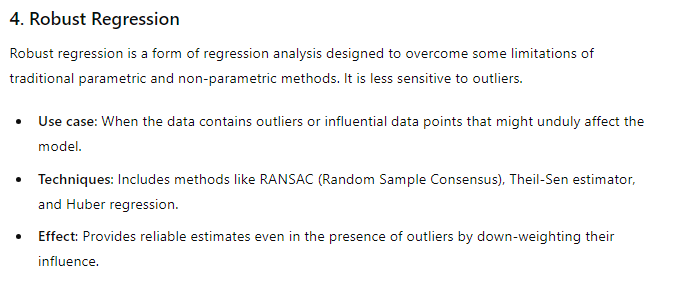

In [109]:
X_df = pd.DataFrame(x, columns=["total_bill", "sex", "smoker", "day", "time", "size"])
X_with_const = sm.add_constant(X_df)
vif_data = pd.DataFrame()
vif_data["feature"] = X_with_const.columns

# Calculating VIF for each feature
vif_data["VIF"] = [
    variance_inflation_factor(X_with_const.values, i)
    for i in range(X_with_const.shape[1])
]
print(vif_data)

      feature        VIF
0       const  16.012193
1  total_bill   1.679317
2         sex   1.060973
3      smoker   1.178744
4         day   1.931998
5        time   1.887896
6        size   1.655849


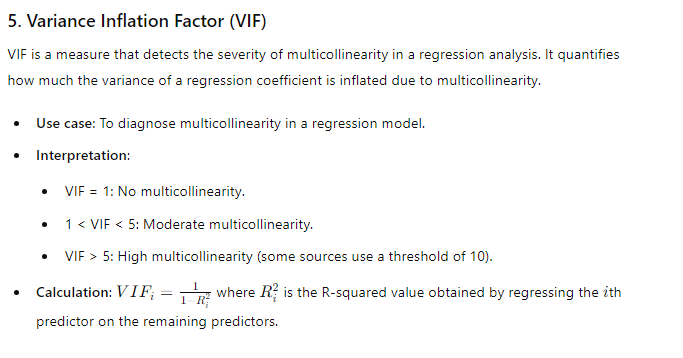

### Elastic Net  Model

In [180]:
#  Elastic Net Regression model
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)  

In [181]:
elastic_net_model.fit(xtrain, ytrain)

ElasticNet()

In [182]:
ypred = elastic_net_model.predict(xtest)

In [191]:
def get_score(model, ypred):

    mae = mean_absolute_error(ytest, ypred)
    mse = mean_squared_error(ytest, ypred)
    r2 = r2_score(ytest, ypred)
    r2_adj = 1 - r2

    print(f"Socre for Test data: {model.score(xtest, ytest)}")
    print(f"Socre for Train data: {model.score(xtrain, ytrain)}")
    print(f"Cofeciant of modern: {model.coef_}")

    print("-" * 100)

    print(f"Model Parameters: {model.get_params()}")
    print(f"Model Interpretection : {model.intercept_}")
#    print(f"Model Rank : {model.rank_}")

    print("-" * 100)

    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R²): {r2}")
    print(f"R-adj : {r2_adj}")

In [192]:
get_score(elastic_net_model,ypred)

Socre for Test data: 0.5489364101409275
Socre for Train data: 0.4290063136596094
Cofeciant of modern: [ 0.09977818  0.         -0.          0.          0.          0.        ]
----------------------------------------------------------------------------------------------------
Model Parameters: {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
Model Interpretection : 1.0705103983880733
----------------------------------------------------------------------------------------------------
Mean Absolute Error (MAE): 0.623181622297227
Mean Squared Error (MSE): 0.5638165622197246
R-squared (R²): 0.5489364101409275
R-adj : 0.45106358985907247


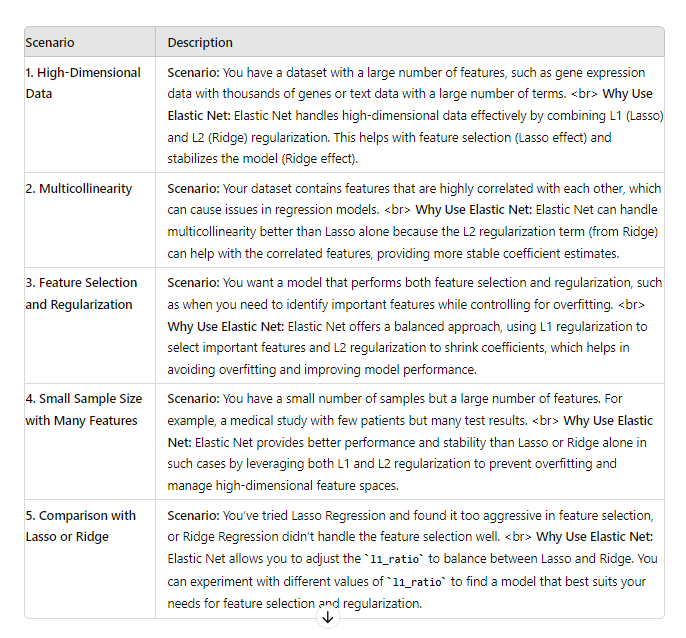

### Bayesian ridge model

In [194]:
bayesian_ridge_model = BayesianRidge()

In [195]:
bayesian_ridge_model.fit(xtrain, ytrain)

BayesianRidge()

In [196]:
ypred = bayesian_ridge_model.predict(xtest)

In [197]:
def get_score(model, ypred):

    mae = mean_absolute_error(ytest, ypred)
    mse = mean_squared_error(ytest, ypred)
    r2 = r2_score(ytest, ypred)
    r2_adj = 1 - r2

    print(f"Socre for Test data: {model.score(xtest, ytest)}")
    print(f"Socre for Train data: {model.score(xtrain, ytrain)}")
    print(f"Cofeciant of modern: {model.coef_}")

    print("-" * 100)

    print(f"Model Parameters: {model.get_params()}")
    print(f"Model Interpretection : {model.intercept_}")
    #    print(f"Model Rank : {model.rank_}")

    print("-" * 100)

    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R²): {r2}")
    print(f"R-adj : {r2_adj}")

In [198]:
get_score(bayesian_ridge_model,ypred)

Socre for Test data: 0.5016604316541788
Socre for Train data: 0.45056863708809236
Cofeciant of modern: [ 0.0984199   0.00860032 -0.0666334   0.02360936  0.00587592  0.14025132]
----------------------------------------------------------------------------------------------------
Model Parameters: {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'alpha_init': None, 'compute_score': False, 'copy_X': True, 'fit_intercept': True, 'lambda_1': 1e-06, 'lambda_2': 1e-06, 'lambda_init': None, 'n_iter': 300, 'tol': 0.001, 'verbose': False}
Model Interpretection : 0.7150268999449918
----------------------------------------------------------------------------------------------------
Mean Absolute Error (MAE): 0.6477685656777906
Mean Squared Error (MSE): 0.622910180647894
R-squared (R²): 0.5016604316541788
R-adj : 0.49833956834582116


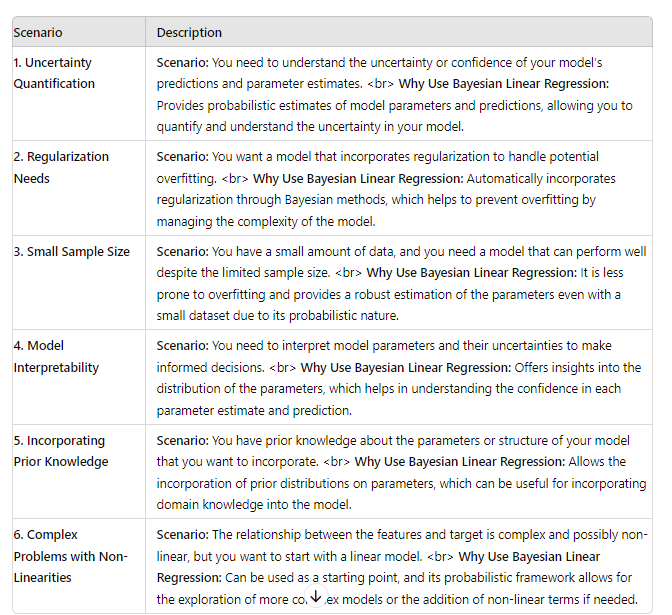

## Summary information

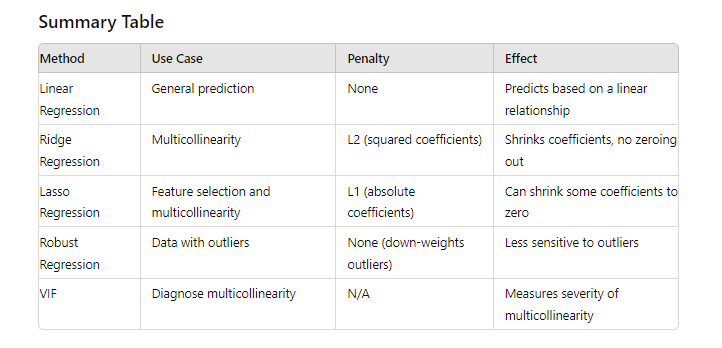